In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid', font_scale=1)
sns.set_palette('Set2', n_colors=10)
plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus=False)

df = pd.read_pickle('data/acc_raw.pkl')
df = df[~df['음주운전'].isnull()]
y_train = df['음주운전']
x_train = df.drop(columns='음주운전')
cat_list = df.select_dtypes(['object']).columns.tolist()
num_list = df.select_dtypes(['number']).drop(columns='음주운전').columns.tolist()
x_train[cat_list] = x_train[cat_list].fillna('UNK')

In [2]:
from catboost import CatBoostClassifier
cb = CatBoostClassifier(nan_mode='Min',
                        eval_metric='Logloss',
                        iterations=220,
                        sampling_frequency='PerTree',
                        leaf_estimation_method='Newton',
                        grow_policy='SymmetricTree',
                        penalties_coefficient=1,
                        boosting_type='Plain',
                        model_shrink_mode='Constant',
                        feature_border_type='GreedyLogSum',
                        l2_leaf_reg=1,
                        random_strength=0.2,
                        rsm=1,
                        boost_from_average=False,
                        model_size_reg=0.5,
                        subsample=0.8,
                        depth=9,
                        posterior_sampling=False,
                        border_count=254,
                        classes_count=0,
                        auto_class_weights=None,
                        sparse_features_conflict_fraction=0,
                        leaf_estimation_backtracking='AnyImprovement',
                        best_model_min_trees=1,
                        model_shrink_rate=0,
                        min_data_in_leaf=1,
                        loss_function='Logloss',
                        learning_rate=0.1,
                        score_function='Cosine',
                        leaf_estimation_iterations=10,
                        bootstrap_type='MVS',
                        max_leaves=512)
cb.fit(x_train, y_train, cat_features=cat_list)

0:	learn: 0.5495090	total: 128ms	remaining: 27.9s
1:	learn: 0.4495783	total: 161ms	remaining: 17.5s
2:	learn: 0.3655201	total: 221ms	remaining: 16s
3:	learn: 0.3075922	total: 281ms	remaining: 15.2s
4:	learn: 0.2656748	total: 338ms	remaining: 14.5s
5:	learn: 0.2354564	total: 397ms	remaining: 14.2s
6:	learn: 0.2138456	total: 447ms	remaining: 13.6s
7:	learn: 0.1970177	total: 505ms	remaining: 13.4s
8:	learn: 0.1841855	total: 558ms	remaining: 13.1s
9:	learn: 0.1743302	total: 617ms	remaining: 12.9s
10:	learn: 0.1672723	total: 674ms	remaining: 12.8s
11:	learn: 0.1619311	total: 751ms	remaining: 13s
12:	learn: 0.1568946	total: 807ms	remaining: 12.8s
13:	learn: 0.1539405	total: 865ms	remaining: 12.7s
14:	learn: 0.1509059	total: 920ms	remaining: 12.6s
15:	learn: 0.1482278	total: 971ms	remaining: 12.4s
16:	learn: 0.1463843	total: 1.02s	remaining: 12.2s
17:	learn: 0.1445256	total: 1.08s	remaining: 12.1s
18:	learn: 0.1429231	total: 1.14s	remaining: 12s
19:	learn: 0.1415842	total: 1.19s	remaining: 11

In [3]:
df['pred'] = cb.predict(x_train)

In [4]:
df[(df['음주운전']==df['pred']) & (df['음주운전']==1)]

사고월  사고일  사고시각  사고요일 사고지역  사망자수  중상자수  경상자수  부상신고자수 사고유형_대범주  ...  \
my_id                                                                  ...   
A000104    1   16    23     2  은평구     0     0     2       0      차대차  ...   
A000127    5   19     8     6  강북구     0     0     1       0      차대차  ...   
A000136    8   21     3     4  구로구     0     0     1       0      차대차  ...   
A000262    1    3     4     4  동작구     0     0     1       0      차대차  ...   
A000286    3   27     1     2  강남구     0     0     3       0      차대차  ...   
...      ...  ...   ...   ...  ...   ...   ...   ...     ...      ...  ...   
A074197   11   12    21     3  송파구     0     0     1       0      차대차  ...   
A074249   12    1    22     1   중구     0     0     1       0     차량단독  ...   
A074271    1   19     0     5  동작구     0     0     4       0      차대차  ...   
A074290    1   18     2     4  마포구     0     0     1       0      차대차  ...   
A074414    3   20    23     4  양천구     0     0     2       0      차대차  ...   

        가해운전자차종 가해운전자성별 가해운전자연령 가해운전자상해정도 피해운전자차종 피해운전자성별 피해운전자연령 피해운전자상해정도  \
my_id                                                                         
A000104      승용       남    37.0      상해없음      승용       남    19.0        경상   
A000127      승용       남    31.0      상해없음      승용       남    47.0        경상   
A000136      승용       남    30.0      상해없음      승용       남    62.0        경상   
A000262      승용       여    27.0      상해없음      승용       남    70.0        경상   
A000286      승용       여    38.0      상해없음      승용       남    59.0      상해없음   
...         ...     ...     ...       ...     ...     ...     ...       ...   
A074197      승용       남    41.0      상해없음      승용       남    66.0        경상   
A074249      이륜       남    28.0        경상     NaN     NaN     NaN       NaN   
A074271      승용       남    32.0      상해없음      승용       남    74.0        경상   
A074290      승용       남    26.0      상해없음      승용       남    71.0        경상   
A074414      승용       남    51.0      상해없음      승용       여    47.0        경상   

         음주운전 pred  
my_id               
A000104   1.0  1.0  
A000127   1.0  1.0  
A000136   1.0  1.0  
A000262   1.0  1.0  
A000286   1.0  1.0  
...       ...  ...  
A074197   1.0  1.0  
A074249   1.0  1.0  
A074271   1.0  1.0  
A074290   1.0  1.0  
A074414   1.0  1.0  

[1750 rows x 26 columns]

In [5]:
import shap

In [6]:
idx = np.where(x_train.index=='A000104')[0]
idxs = np.where(x_train.index.isin(df[(df['음주운전']==df['pred']) & (df['음주운전']==1)].index))[0]
my_sample = df.iloc[idx]
my_sample

사고월  사고일  사고시각  사고요일 사고지역  사망자수  중상자수  경상자수  부상신고자수 사고유형_대범주  ...  \
my_id                                                                  ...   
A000104    1   16    23     2  은평구     0     0     2       0      차대차  ...   

        가해운전자차종 가해운전자성별 가해운전자연령 가해운전자상해정도 피해운전자차종 피해운전자성별 피해운전자연령 피해운전자상해정도  \
my_id                                                                         
A000104      승용       남    37.0      상해없음      승용       남    19.0        경상   

         음주운전 pred  
my_id               
A000104   1.0  1.0  

[1 rows x 26 columns]

In [7]:
explainer = shap.Explainer(cb)
shap_values = explainer(x_train)

In [8]:
pd.DataFrame({'col':x_train.columns, 'importance':cb.get_feature_importance()}).sort_values('importance',ascending=False)

col  importance
2        사고시각   19.420687
18    가해운전자연령   15.885010
10   사고유형_소범주    6.912502
16    가해운전자차종    5.978159
4        사고지역    5.512746
11       법규위반    5.465499
22    피해운전자연령    4.887620
20    피해운전자차종    4.553872
1         사고일    4.449618
3        사고요일    3.983788
17    가해운전자성별    3.575351
19  가해운전자상해정도    3.254348
0         사고월    2.837362
15   도로형태_소범주    2.354454
7        경상자수    2.335539
9    사고유형_대범주    1.742452
14   도로형태_대범주    1.636626
23  피해운전자상해정도    1.492204
13       기상상태    1.086708
6        중상자수    1.002249
21    피해운전자성별    0.986785
12       노면상태    0.309314
8      부상신고자수    0.270143
5        사망자수    0.066964

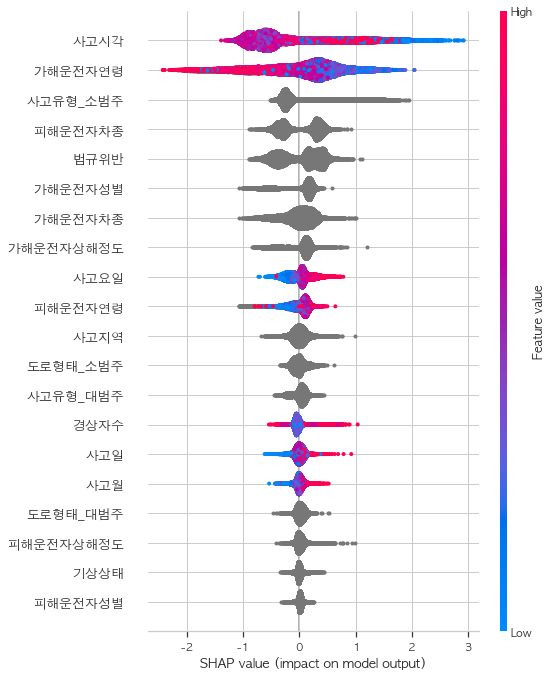

In [9]:
shap.summary_plot(shap_values, x_train)

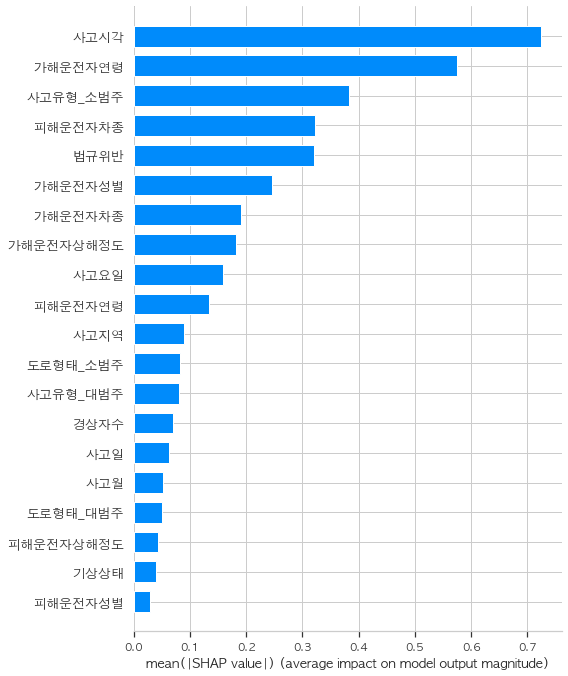

In [10]:
shap.summary_plot(shap_values, x_train, plot_type='bar')

In [11]:
shap.initjs()
shap.force_plot(shap_values[idx[0]])

Glyph 8722 (\N{MINUS SIGN}) missing from current font.
Glyph 8722 (\N{MINUS SIGN}) missing from current font.


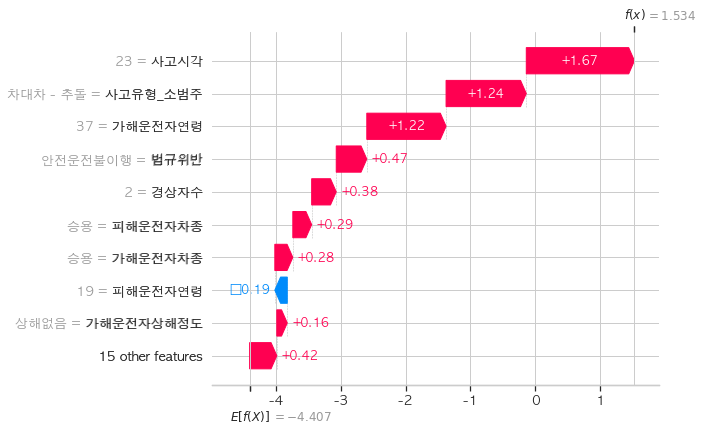

In [12]:
shap.initjs()
shap.plots.waterfall(shap_values[idx[0]])

In [13]:
shap.initjs()
shap.force_plot(shap_values[idxs], x_train.iloc[idxs])

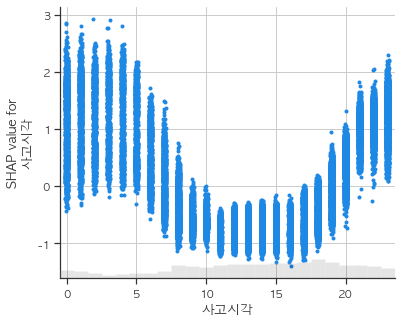

In [14]:
shap.plots.scatter(shap_values[:,'사고시각'])

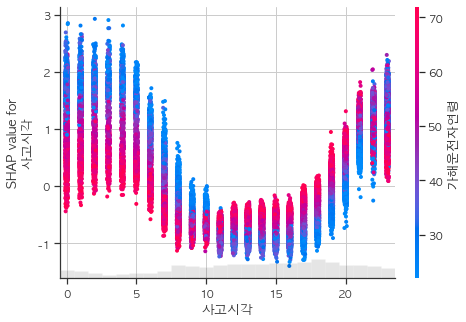

In [15]:
shap.plots.scatter(shap_values[:,'사고시각'], color=shap_values[:,'가해운전자연령'])

- Clustering과의 결합

In [16]:
from pycaret.clustering import *
s = setup(x_train, normalize=True, categorical_features=cat_list, numeric_features=num_list)

In [17]:
kmeans = create_model('kmeans')

Initiated  . . . . . . . . . . . . . . . . . .              16:01:44
Status     . . . . . . . . . . . . . . . . . .  Loading Dependencies
Estimator  . . . . . . . . . . . . . . . . . .     Compiling Library

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [18]:
result = assign_model(kmeans, transformation=True)
result02 = assign_model(kmeans)
result.head()

사고월       사고일      사고시각      사고요일  사고지역_영등포구  사고지역_성북구  \
my_id                                                                  
A000002 -0.771267  0.006995 -1.379635  0.059937   3.906269 -0.198046   
A000003 -1.065335 -1.484219  1.380068 -0.976506  -0.255999  5.049334   
A000004 -0.477199  0.121704  0.730726  0.578158  -0.255999 -0.198046   
A000005  1.287209  0.236413 -1.054964 -1.494727  -0.255999 -0.198046   
A000006 -0.477199  0.580540  0.081384 -0.976506  -0.255999 -0.198046   

         사고지역_구로구  사고지역_마포구  사고지역_송파구  사고지역_관악구  ...  피해운전자성별_기타불명   피해운전자연령  \
my_id                                            ...                           
A000002 -0.199778 -0.195562 -0.281178  -0.19768  ...     -0.046939  1.586474   
A000003 -0.199778 -0.195562 -0.281178  -0.19768  ...     -0.046939 -0.334230   
A000004  5.005550 -0.195562 -0.281178  -0.19768  ...     -0.046939  1.090808   
A000005  5.005550 -0.195562 -0.281178  -0.19768  ...     -0.046939  0.719059   
A000006 -0.199778  5.113473 -0.281178  -0.19768  ...     -0.046939 -0.458146   

         피해운전자상해정도_중상  피해운전자상해정도_경상  피해운전자상해정도_부상신고  피해운전자상해정도_상해없음  \
my_id                                                                 
A000002      2.063944     -1.228117       -0.203653       -0.382514   
A000003     -0.484509      0.814255       -0.203653       -0.382514   
A000004     -0.484509      0.814255       -0.203653       -0.382514   
A000005      2.063944     -1.228117       -0.203653       -0.382514   
A000006     -0.484509      0.814255       -0.203653       -0.382514   

         피해운전자상해정도_UNK  피해운전자상해정도_기타불명  피해운전자상해정도_사망    Cluster  
my_id                                                            
A000002      -0.176133       -0.082104     -0.065815  Cluster 3  
A000003      -0.176133       -0.082104     -0.065815  Cluster 1  
A000004      -0.176133       -0.082104     -0.065815  Cluster 1  
A000005      -0.176133       -0.082104     -0.065815  Cluster 1  
A000006      -0.176133       -0.082104     -0.065815  Cluster 1  

[5 rows x 147 columns]

In [19]:
cluster_summary = result.groupby('Cluster').mean()
cluster_summary02 = result02.groupby('Cluster').mean().join(result02.select_dtypes(['object','category']).groupby('Cluster').agg(lambda x:x.mode()))
cluster_summary02 = cluster_summary02[x_train.columns]
cluster_summary.T

Cluster         Cluster 0  Cluster 1  Cluster 2  Cluster 3
사고월             -0.041370   0.009108   0.039758  -0.028968
사고일             -0.039883   0.000994   0.041287  -0.004851
사고시각            -0.030179  -0.002517  -0.189688   0.034253
사고요일            -0.026938   0.007565   0.006756  -0.021352
사고지역_영등포구       -0.155327   0.020545  -0.058680  -0.041218
...                   ...        ...        ...        ...
피해운전자상해정도_부상신고  -0.062901  -0.033103  -0.203653   0.130923
피해운전자상해정도_상해없음   0.307324   0.127003  -0.382514  -0.359998
피해운전자상해정도_UNK   -0.176133  -0.176133   5.677521  -0.176133
피해운전자상해정도_기타불명  -0.041197   0.030446  -0.082104  -0.077758
피해운전자상해정도_사망    -0.065815  -0.048216  -0.065815   0.159170

[146 rows x 4 columns]

In [20]:
cb.predict_proba(cluster_summary02)[:,1]

array([0.01226969, 0.03128439, 0.00099572, 0.00701101])

In [21]:
explainer = shap.Explainer(cb)
shap_values = explainer(cluster_summary02)

In [22]:
shap.initjs()
shap.force_plot(shap_values, cluster_summary02, figsize=20)